# Q3) Parsing JCAMP-JDX files

## Parsing code

In [136]:
def read_file(filename): 
    '''Allows Python to access and read the contents of any given file.'''
    with open(filename, 'r') as file:
        return file.read()

def parse_file(filename):
    '''
    Reads the data file contents and returns 2 lists, the first containing all
    the x-values (i.e. wavenumbers) and the second containing the average value of
    all the y-values (i.e. transmittance readings) corresponding to each x-value.
    '''
    lines = read_file(filename).split('\n')
    
    x_values = []
    y_values = []

    for line in lines[:-1]: 
        first_char = line[0]
        
        if first_char.isdigit():
            items = line.split(' ')
            
            x_item = float(items[0])
            x_values.append(x_item)
            
            y_holder = items[1:]
            y_list = [float(ele) for ele in y_holder]
            y_item = sum(y_list)/len(y_list)
            y_values.append(y_item)
            
    return x_values, y_values

## Plotting figures

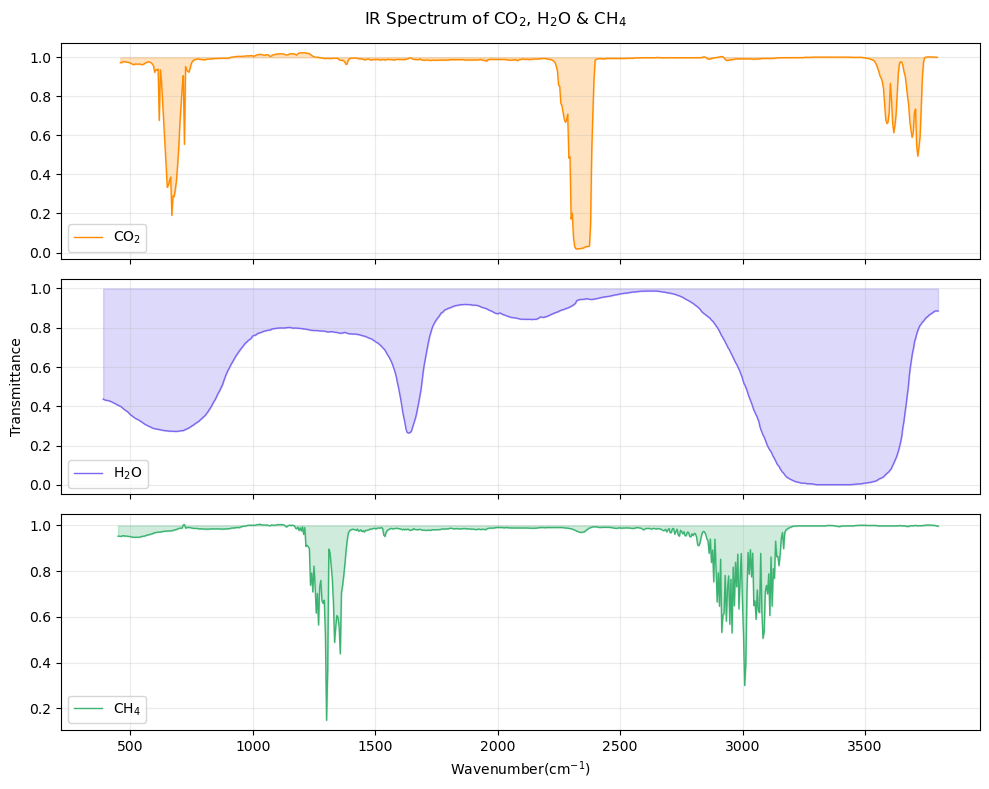

In [137]:
from matplotlib import pyplot as plt

co2_file = '124-38-9-IR.jdx'
water_file = '7732-18-5-IR.jdx'
methane_file = '74-82-8-IR.jdx'

# Carbon Dioxide Data

co2_x = parse_file(co2_file)[0]
co2_y = parse_file(co2_file)[1]

# Water Data

water_x = parse_file(water_file)[0]
water_y = parse_file(water_file)[1]

# Methane Data

methane_x = parse_file(methane_file)[0]
methane_y = parse_file(methane_file)[1]


# Plotting figures
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(10, 8), sharex=True)
ax[0].plot(co2_x, co2_y, label=r'CO$_{2}$', color='darkorange', linewidth=1.0)
ax[0].fill_between(co2_x, 1, co2_y, alpha=.25, color='darkorange')

ax[1].plot(water_x, water_y, label=r'H$_{2}$O', color='mediumslateblue', linewidth=1.0)
ax[1].fill_between(water_x, 1, water_y, alpha=.25, color='mediumslateblue')
ax[1].set_ylabel('Transmittance')

ax[2].plot(methane_x, methane_y, label=r'CH$_{4}$', color='mediumseagreen', linewidth=1.0)
ax[2].fill_between(methane_x, 1, methane_y, alpha=.25, color='mediumseagreen')
ax[2].set_xlabel(r'Wavenumber(cm$^{-1}$)')

for a in ax:
    a.legend(loc='lower left')
    a.grid(alpha=.25)

fig.suptitle(r'IR Spectrum of CO$_{2}$, H$_{2}$O & CH$_{4}$')
fig.tight_layout()
plt.show()